In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 

In [27]:
print os.getcwd()

/Users/nathanchoo/Desktop/Craig/DAT_SF_10/StanfordMachineLearning/assignments/Week 2


In [28]:
#FOOD TRUCK DATA
df = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt', header=None )

In [29]:
df.columns = ['population','profit']
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [52]:

def SimpleLinearRegression(data,param1,param2,plotsize_x=5,plotsize_y=5,x_label = "" ,y_label = ""):
    '''
    :param data: dataframe
    :param param1: column name 1
    :param param2: column name 2
    :return: plot of data and regression line
    :usage: SimpleLinearRegression(data,'bedrooms','price')
    '''

    x = data[param1].values
    y = data[param2].values

    X = sm.add_constant(x, prepend=True)
    results = sm.OLS(y, X).fit()
    print results.summary()
    intercept,slope = results.params
    r2 = results.rsquared
    plt.figure(figsize = (plotsize_x,plotsize_y))
    plt.plot(x,y,'bo')
    xl = np.array([min(x),max(x)])
    yl = intercept + slope * xl
    plt.plot(xl,yl,'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    title_string = str(param1).upper() +' vs '+ str(param2).upper() + ", r2: " + str(r2)
    plt.title(title_string)
    
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 17 Nov 2016   Prob (F-statistic):           1.02e-26
Time:                        17:38:49   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.0

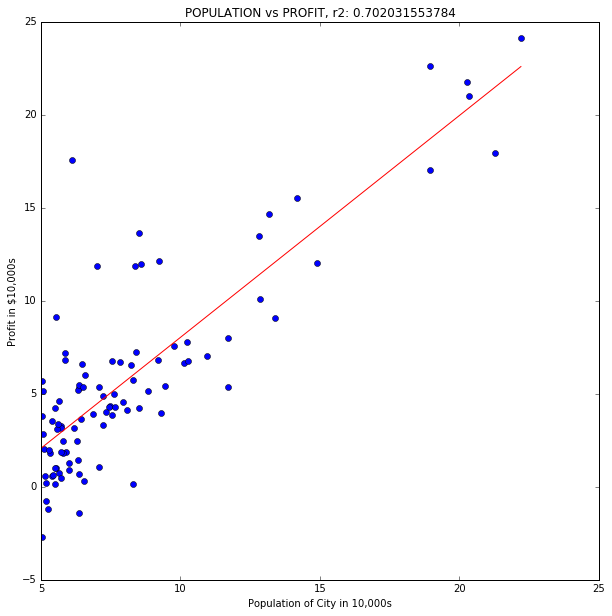

In [53]:
SimpleLinearRegression(df,'population','profit',10,10,'Population of City in 10,000s', 'Profit in $10,000s')